## Experiemet with Google Gemini

In [27]:
import os
from google import genai
from google.genai import types
from IPython.display import display, Image, Markdown
import PIL.Image
import requests
from io import BytesIO
from pdf2image import convert_from_path
from dotenv import load_dotenv
from IPython.display import Markdown

In [2]:
load_dotenv()

True

In [18]:
client = genai.Client(api_key=os.environ["GEMINI_API_KEY"])

In [19]:
# Function to load a PDF file and convert it to an image for Gemini
def load_pdf_for_gemini(pdf_path):
    """
    Load a PDF file from local path and prepare it for Gemini Vision model.
    
    Args:
        pdf_path (str): Path to the local PDF file
        
    Returns:
        PIL.Image: The first page of the PDF as an image
    """
    try:    
        # Convert the first page of the PDF to an image
        # Convert all pages of the PDF to images
        images = convert_from_path(pdf_path)
        
        if images:
            return images
        else:
            print("No images extracted from the PDF.")
            return None
    except Exception as e:
        print(f"Error loading PDF: {e}")
        return None

In [40]:
pdf_dir = "pdf_collection"
os.listdir(pdf_dir)

['empty_graph.pdf',
 'screenshot_text_and_image.pdf',
 'apple_10k_long_documents.pdf',
 'complex_graph.pdf',
 'syllabus.pdf',
 'table.pdf']

In [41]:
files = []
for pdf_file in os.listdir(pdf_dir):
    print("Processing PDF file:", pdf_file)
    images = load_pdf_for_gemini(os.path.join(pdf_dir, pdf_file))
    if images:
        print("Number of images extracted:", len(images))
    else:
        print("No images extracted from the PDF.")
    files.append(images)

Processing PDF file: empty_graph.pdf
Number of images extracted: 1
Processing PDF file: screenshot_text_and_image.pdf
Number of images extracted: 1
Processing PDF file: apple_10k_long_documents.pdf
Number of images extracted: 121
Processing PDF file: complex_graph.pdf
Number of images extracted: 1
Processing PDF file: syllabus.pdf
Number of images extracted: 9
Processing PDF file: table.pdf
Number of images extracted: 1


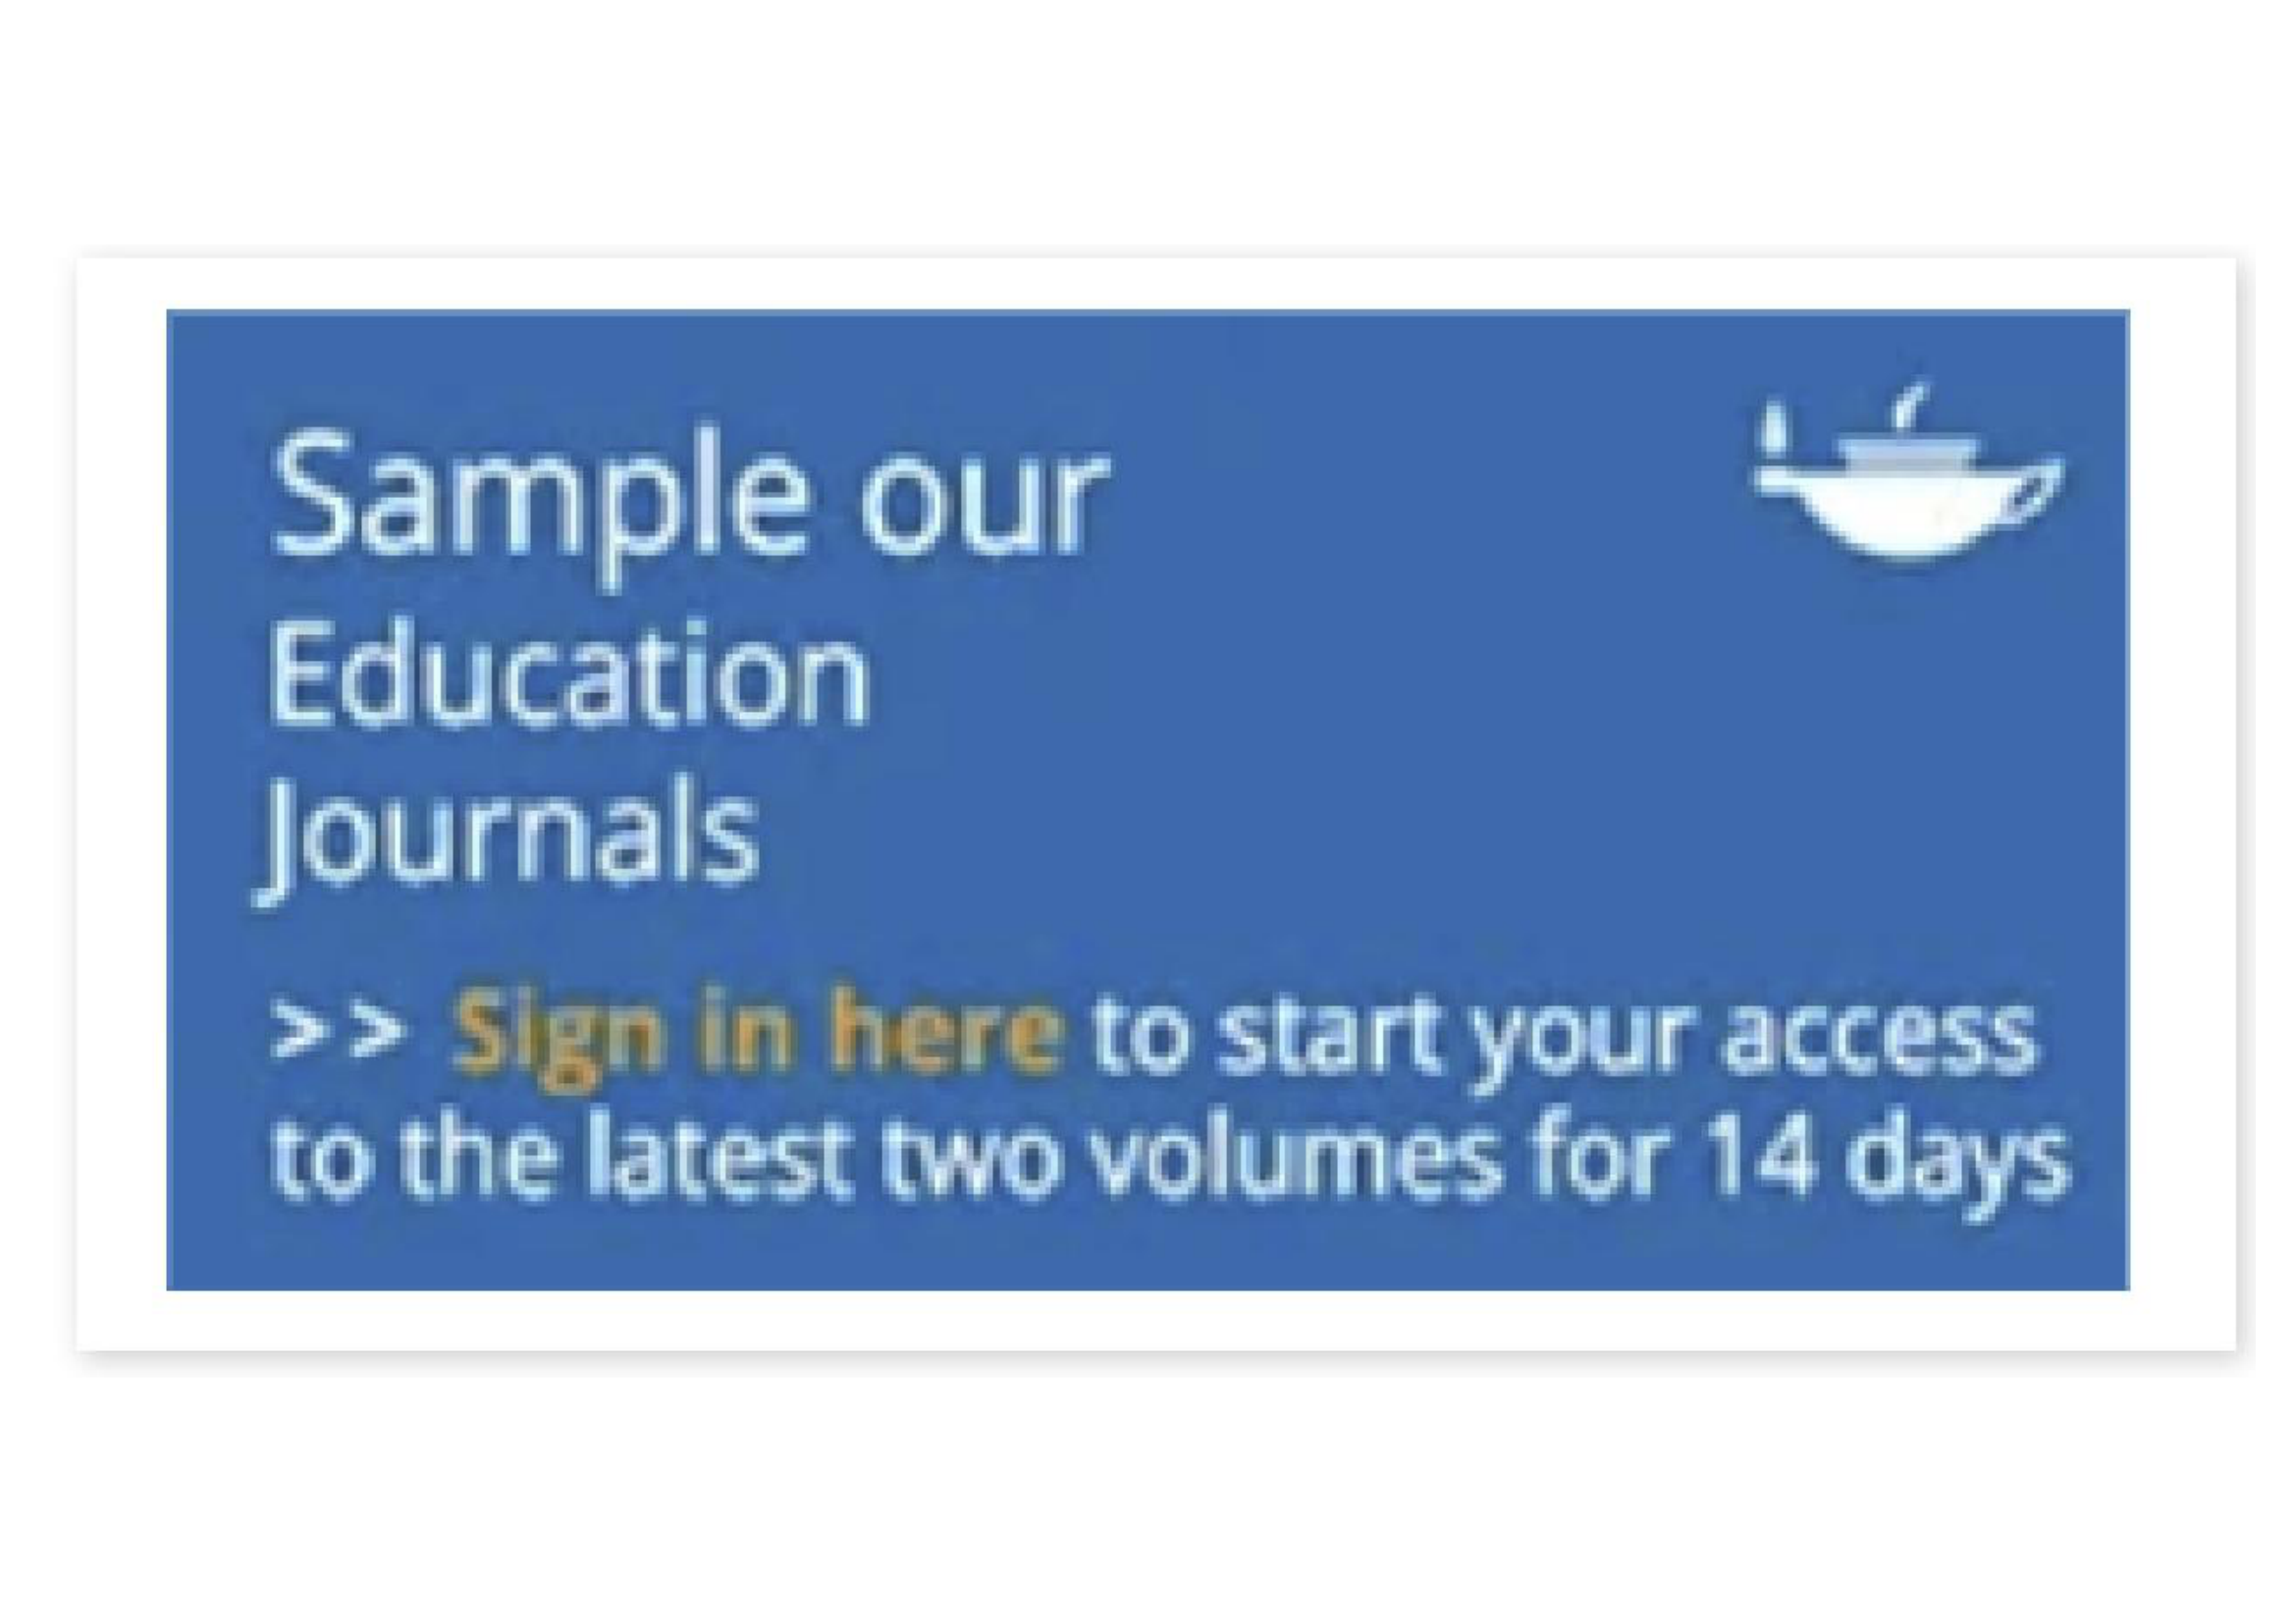

In [50]:
display(files[1][0])

In [51]:
type(files[1][0])

PIL.PpmImagePlugin.PpmImageFile

## **Gemini-2.5-pro-exp-03-25**

## Experiment 1: Empty_Graph

In [28]:
response = client.models.generate_content(
    model="gemini-2.5-pro-exp-03-25",
    contents=["tell me about this graph?", files[0]])
from IPython.display import Markdown
display(Markdown(response.text))

Okay, let's break down this graph:

1.  **Type of Graph:** This is a **pie chart**. Pie charts are used to show proportions or percentages of a whole. The entire circle represents 100%.

2.  **Segments:** The chart is divided into **three segments** (or slices).

3.  **Colors:** The segments are colored **blue**, **red** (or reddish-orange), and **yellow** (or golden yellow).

4.  **Proportions (Visual Estimation):**
    *   The **blue** segment is the largest, appearing to represent slightly more than half of the total (perhaps around 55-60%).
    *   The **yellow** segment is the second largest, looking like roughly a quarter of the total (perhaps around 25-30%).
    *   The **red** segment is the smallest, making up the remainder (perhaps around 15-20%).

5.  **Missing Information:** Crucially, the chart lacks:
    *   **Labels:** We don't know what each colored segment represents (e.g., categories, groups, items).
    *   **Values/Percentages:** There are no exact numbers or percentages shown for each slice.
    *   **Title:** We don't know the overall topic or context of the data being represented.

**In summary:** This is a simple pie chart illustrating how a whole is divided into three distinct parts. The blue part constitutes the majority, followed by the yellow part, and then the smallest red part. However, without labels or specific values, we cannot determine what data is being shown or the precise proportions.

## Experiment 2: Screenshot_Text_and_Image

In [29]:
response = client.models.generate_content(
    model="gemini-2.5-pro-exp-03-25",
    contents=["Describe this content?", files[1]])
from IPython.display import Markdown
display(Markdown(response.text))

This image is a **promotional graphic or advertisement banner**.

Here's a breakdown of its content:

1.  **Headline:** "Sample our Education Journals" - Clearly states the subject matter being promoted.
2.  **Call to Action:** ">> Sign in here to start your access to the latest two volumes for 14 days".
    *   "Sign in here" is highlighted (likely a hyperlink in a digital context).
    *   It specifies the benefit: access to the "latest two volumes".
    *   It details the duration of the offer: "for 14 days".
3.  **Visual Elements:**
    *   A solid blue background.
    *   White text for readability.
    *   A white icon in the top right corner, which appears to be a stylized oil lamp or "lamp of knowledge," commonly associated with education and learning.

In summary, it's an **advertisement offering a 14-day free trial access to recent education journals**, requiring users to sign in to activate the trial.

## Experiment 3: Complex_Graph

In [ ]:
response = client.models.generate_content(
    model="gemini-2.5-pro-exp-03-25",
    contents=["What's inside Figure 2?", files[3]])
from IPython.display import Markdown
display(Markdown(response.text))

Based on the image and its caption, **Figure 2 shows the architecture of the Pixtral Vision Encoder**.

Specifically, it illustrates the following components and processes:

1.  **Image Patches:** The input images are divided into patches.
2.  **RoPE-2D:** Rotary Position Embeddings (2D) are used to encode the position of these patches, facilitating variable image sizes.
3.  **Block-diagonal attention mask:** This mask is used to enable sequence packing, allowing efficient batching of images with different sizes/aspect ratios by preventing attention leakage between different images in the batch.
4.  **Pixtral-VIT:** The core Vision Transformer model that processes the image patches and positional information. It's noted as a Bidirectional Transformer.
5.  **Vision-Language Projector:** A component (likely involving an MLP) that projects the visual features into a space compatible with a language model.
6.  **Output Embeddings:** The final output representation of the image.
7.  **Token Handling:** It shows the addition of `[IMG_BREAK]` and `[IMG_END]` tokens, likely used for managing sequences of images or distinguishing between them.

The caption emphasizes that this encoder is designed to natively support variable image sizes and aspect ratios, using block-diagonal attention masks for sequence packing and RoPE-2D for flexible positional encoding.

## Experiment 4: Syllabus

In [32]:
response = client.models.generate_content(
    model="gemini-2.5-pro-exp-03-25",
    contents=["What's covered in week 2?", files[4]])
from IPython.display import Markdown
display(Markdown(response.text))

According to the syllabus provided (specifically on page 2 under "Weekly Structure"), **Weeks 2-4** cover **SQL Language**.

Page 3 further breaks down the SQL Language topic into:
*   Introduction to SQL
*   Intermediate SQL
*   Advanced SQL

Therefore, Week 2 will begin the study of SQL Language, likely focusing on the **Introduction to SQL** and possibly moving into **Intermediate SQL**.

## Experiment 5: Table

In [33]:
response = client.models.generate_content(
    model="gemini-2.5-pro-exp-03-25",
    contents=["Extract the table from this image and present it in a table format", files[5]])
from IPython.display import Markdown
display(Markdown(response.text))

Okay, here is the table extracted from the image:

|                              | Percentage % | Count |
| :--------------------------- | :----------- | :---- |
| **Gender**                   |              |       |
| Female                       | 49.0%        | 540   |
| Male                         | 51.0%        | 561   |
| Early Childhood              | 3.3%         | 36    |
| **What grades do you teach** |              |       |
| **in school?**               |              |       |
| Elementary School            | 21.0%        | 231   |
| High School                  | 29.4%        | 324   |
| Primary School               | 46.3%        | 510   |
| Bachelor                     | 83.1%        | 915   |
| **Educational Levels**       |              |       |
| Master                       | 12.0%        | 132   |
| PhD                          | 2.7%         | 30    |
| Diploma                      | 2.2%         | 24    |
| **Teaching Experience**      |              |       |
| 0–5                          | 24.3%        | 267   |
| 11–15                        | 36.8%        | 405   |
| 6–10                         | 37.6%        | 414   |
| +16                          | 1.4%         | 15    |

## **gemini-2.0-flash**

## Experiment 1: Empty_Graph

In [34]:
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["tell me about this graph?", files[0]])
from IPython.display import Markdown
display(Markdown(response.text))

Here's what I can tell you about the graph based on the image:

*   **Type:** It's a pie chart.
*   **Colors:** It has three segments, colored blue, red, and yellow.
*   **Proportions:** The blue segment is the largest, likely representing close to half of the total. The red and yellow segments appear smaller and roughly similar in size to each other. Without specific data labels, I can't give exact percentages.
*   **Purpose:** Pie charts are used to show the relative proportions of different categories that make up a whole. Therefore, this chart is probably showing the distribution of something across three categories represented by the three colors.

## Experiment 2: Screenshot_Text_and_Image

In [35]:
response = client.models.generate_content(
    model="gemini-2.5-pro-exp-03-25",
    contents=["Describe this content?", files[1]])
from IPython.display import Markdown
display(Markdown(response.text))

The image is an advertisement on a blue background. The text on the image reads "Sample our Education Journals." Below that, it says ">> Sign in here to start your access to the latest two volumes for 14 days". There is also a small icon of an oil lamp on the top right of the image.

## Experiment 3: Complex_Graph

In [36]:
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["What's inside Figure 2?", files[2]])
from IPython.display import Markdown
display(Markdown(response.text))

Figure 2 illustrates the Pixtral Vision Encoder. It shows the flow of information through the encoder, starting with Image Patches, then RoPE-2D (position encodings), a Block-diagonal attention mask, a Bidirectional Transformer, Pixtral-ViT, a Vision-Language Projector, an MLP, and finally, Output Embeddings. The figure also shows that "Add [IMG_BREAK] and [IMG_END] tokens" is performed after the Vision-Language Projector.


## Experiment 4: Syllabus

In [37]:
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["What's covered in week 2?", files[3]])
from IPython.display import Markdown
display(Markdown(response.text))

Weeks 2-4 covers SQL language, including:

*   Introduction to SQL
*   Intermediate SQL
*   Advanced SQL

## Experiment 5: Table

In [39]:
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["Extract the table from this image and present it in a table format", files[4]])
from IPython.display import Markdown
display(Markdown(response.text))

Here is the table extracted from the image:

|                       | Percentage % | Count |
| :-------------------- | :------------ | :---- |
| **Gender**            |               |       |
| Female                | 49.0%         | 540   |
| Male                  | 51.0%         | 561   |
| Early Childhood       | 3.3%          | 36    |
| **What grades do you teach in school?** |               |       |
| Elementary School     | 21.0%         | 231   |
| High School           | 29.4%         | 324   |
| Primary School        | 46.3%         | 510   |
| Bachelor              | 83.1%         | 915   |
| **Educational Levels** |               |       |
| Master                | 12.0%         | 132   |
| PhD                   | 2.7%          | 30    |
| Diploma               | 2.2%          | 24    |
| **Teaching Experience** |               |       |
| 0-5                   | 24.3%         | 267   |
| 11-15                 | 36.8%         | 405   |
| 6-10                  | 37.6%         | 414   |
| +16                   | 1.4%          | 15    |

## Experiment 6: Apple 10K - Long Document

In [42]:
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["What are the product, service and software annoucnements?", files[2]])
from IPython.display import Markdown
display(Markdown(response.text))

Here are the product, service, and software announcements as stated in the document:

**First Quarter 2024:**
*   MacBook Pro 14-in.
*   MacBook Pro 16-in.
*   iMac

**Second Quarter 2024:**
*   MacBook Air 13-in.
*   MacBook Air 15-in.

**Third Quarter 2024:**

*   iPad
*   iPad Pro
*   iOS 18, macOS Sequoia, iPadOS 18, watchOS 11, visionOS 2 and tvOS 18, updates to the Company's operating systems; and
*   Apple Intelligence(TM), a personal intelligence system that uses generative models.

**Fourth Quarter 2024:**

*   iPhone 16, iPhone 16 Plus, iPhone 16 Pro and iPhone 16 Pro Max;
*   Apple Watch Series 10; and
*   AirPods 4.

In [44]:
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["What's the segment operating performance for 2024, by geography? Provide the answer in JSON with two keys: answer and page_number}", files[2]])
from IPython.display import Markdown
display(Markdown(response.text))

```json
{
  "answer": "Here is the Segment Operating Income (in millions) for 2024 by geography:\n\n*   Americas: $67,656\n*   Europe: $41,700\n*   Greater China: $27,662\n*   Japan: $12,454\n*   Rest of Asia Pacific: $13,062",
  "page_number": 47
}
```

In [45]:
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["How has products and servcies revenue changed from 2023 to 2024? Provide the answer in JSON with two keys: answer and page_number}", files[2]])
from IPython.display import Markdown
display(Markdown(response.text))

```json
{
"answer": "Products and Services revenue increased by 2.4% from $383,285 million in 2023 to $391,035 million in 2024.",
"page_number": 29
}
```

## Gemini Caching

In [70]:
cache = client.caches.create(
    model = "gemini-2.0-flash",
    config = types.CreateCachedContentConfig(
        display_name = "apple_10k_cache",
        system_instruction = (
            "You are a financial analyst that can answer questions about the Apple 10K report."
        ),
        contents = [files[2]],
        ttl = "600s"
    ),
)

In [71]:
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["What are the product, service and software annoucnements?"],
    config = types.GenerateContentConfig(
        cached_content = cache.name,
        temperature = 0.0,
    )
)
from IPython.display import Markdown
display(Markdown(response.text))

Here are the product, service, and software announcements from the 10K report:

**First Quarter 2024:**

*   MacBook Pro 14-in.
*   MacBook Pro 16-in.
*   iMac

**Second Quarter 2024:**

*   MacBook Air 13-in.
*   MacBook Air 15-in.

**Third Quarter 2024:**

*   iPad
*   iPad Pro
*   iOS 18, macOS Sequoia, iPadOS 18, watchOS 11, visionOS 2 and tvOS 18, updates to the Company's operating systems
*   Apple Intelligence, a personal intelligence system that uses generative models

**Fourth Quarter 2024:**

*   iPhone 16, iPhone 16 Plus, iPhone 16 Pro and iPhone 16 Pro Max
*   Apple Watch Series 10
*   AirPods 4

In [72]:
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["What's the segment operating performance for 2024, by geography? Provide the answer in JSON with two keys: answer and page_number}"],
    config = types.GenerateContentConfig(
        cached_content=cache.name,
        temperature = 0.0,
    )
)
from IPython.display import Markdown
display(Markdown(response.text))

```json
{
"answer": "Americas: $167,045\nEurope: $101,328\nGreater China: $66,652\nJapan: $25,652\nRest of Asia Pacific: $30,658\nTotal net sales: $391,335",
"page_number": 22
}
```

In [73]:
response = client.models.generate_content(
    model = "gemini-2.0-flash",
    contents = ["How has products and servcies revenue changed from 2023 to 2024? Provide the answer in JSON with two keys: answer and page_number}"],
    config = types.GenerateContentConfig(
        cached_content = cache.name
    )
)
display(Markdown(response.text))

```json
{
  "answer": "From 2023 to 2024, iPhone revenue decreased from $200,563 million to $201,183 million. Mac revenue increased from $29,350 million to $29,984 million. iPad revenue decreased from $26,850 million to $25,694 million. Wearables, Home and Accessories revenue decreased from $39,840 million to $37,005 million. Services revenue increased from $85,250 million to $96,169 million.",
  "page_number": 23
}
```

**Comment**
- Caching itself takes quite some time
- Cashing costs: 
    - $1.00/1,000,000 tokens per hour
    - the cached tokens are then billed at $0.025/1,000,000 tokens, 1/4 of the original cost ($0.1/1,000,000 tokens) when used in following prompts
- The minimum input token count for context caching is 4,096, and the maximum is the same as the maximum for the given model
- For cashed documents, the reponse time is roughly 1/4 the time of the non-cached responses